In [1]:
from scipy import stats
import numpy as np
import pandas as pd
df = pd.read_csv("movieReplicationSet.csv")


In [2]:
movie = df[["The Lion King (1994)", "Are you an only child? (1: Yes; 0: No; -1: Did not respond)"]]
print(movie)
movie = movie.to_numpy()

      The Lion King (1994)  \
0                      4.0   
1                      NaN   
2                      4.0   
3                      3.0   
4                      4.0   
...                    ...   
1092                   3.5   
1093                   3.5   
1094                   NaN   
1095                   NaN   
1096                   4.0   

      Are you an only child? (1: Yes; 0: No; -1: Did not respond)  
0                                                     0            
1                                                     0            
2                                                     1            
3                                                     0            
4                                                     1            
...                                                 ...            
1092                                                  0            
1093                                                  0            
1094                       

In [2]:
movie_array = df.iloc[:,:400].to_numpy()

user = np.zeros((len(movie_array),len(movie_array[0])))
temp = []
for i in range(len(movie_array)):
    temp = []
    for num in movie_array[i]:
        if num >= 0:
            temp.append(num)
    temp.sort()
    for j in range(len(movie_array[i])):
        if(movie_array[i][j] >= 0):
            res = stats.percentileofscore(temp, movie_array[i][j])
            user[i,j] = res
print(user)

[[ 0.          0.         86.42857143 ...  0.          0.
   0.        ]
 [ 0.          0.         20.45454545 ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.         82.88288288 ...  0.          0.
   0.        ]]


In [15]:
index = df.columns.get_loc("Psycho (1960)")
index = df.columns[[17,22,54,57,149,186,252]]
print(index)
#shrek = user[:,index]

17


In [5]:
def gender_pairwise_test(s):
    movie = df[[s, "Gender identity (1 = female; 2 = male; 3 = self-described)"]]
    movie = movie.to_numpy()
    list_1 = []
    list_2 = []
    for i in range(len(movie)):
        if movie[i][0] >= 0:
            if movie[i][1] == 1:
                list_1.append(i)
            elif movie[i][1] == 2:
                list_2.append(i)

    data_set_1 = movie[list_1,0]
    data_set_2 = movie[list_2,0]
    #res1 = stats.ttest_ind(data_set_1,data_set_2)
    res2 = stats.mannwhitneyu(data_set_1,data_set_2)
    return res2.pvalue

In [19]:
movie_array = df.iloc[:,:400].to_numpy()

import matplotlib.pyplot as plt

def gender_pairwise_ranking_test(s):
    index = df.columns.get_loc(s)
    tmp = user[:,index]
    movie = df[[s, "Gender identity (1 = female; 2 = male; 3 = self-described)"]]
    movie = movie.to_numpy()
    list_t = []
    list_1 = []
    list_2 = []
    #using mean
    for i in range(len(movie)):
        if movie[i][0] >= 0:
            list_t.append(i)
            if movie[i][1] == 1:
                list_1.append(i)
            elif movie[i][1] == 2:
                list_2.append(i)
    #using median

    data_set_1 = tmp[list_1]
    data_set_2 = tmp[list_2]
    # plt.hist(tmp[list_1],bins=20)
    # plt.show()
    # plt.hist(tmp[list_2],bins=20)
    # plt.show()
    plt.hist(tmp[list_t],bins=20)
    plt.show()
    #res1 = stats.ttest_ind(data_set_1,data_set_2)
    res2 = stats.mannwhitneyu(data_set_1,data_set_2)
    return res2.pvalue

In [5]:
def sibling_pairwise_test(s):
    movie = df[[s, "Are you an only child? (1: Yes; 0: No; -1: Did not respond)"]]
    movie = movie.to_numpy()
    list_1 = []
    list_2 = []
    for i in range(len(movie)):
        if movie[i][0] >= 0:
            if movie[i][1] == 1:
                list_1.append(i)
            elif movie[i][1] == 0:
                list_2.append(i)

    data_set_1 = movie[list_1,0]
    data_set_2 = movie[list_2,0]
    #res1 = stats.ttest_ind(data_set_1,data_set_2)
    res2 = stats.mannwhitneyu(data_set_1,data_set_2)
    return res2.pvalue

In [6]:


def sibling_pairwise_ranking_test(s):
    index = df.columns.get_loc(s)
    tmp = user[:,index]
    movie = df[[s, "Are you an only child? (1: Yes; 0: No; -1: Did not respond)"]]
    movie = movie.to_numpy()
    list_1 = []
    list_2 = []
    list_t = []
    #using mean
    for i in range(len(movie)):
        if movie[i][0] >= 0:
            list_t.append(i)
            if movie[i][1] == 1:
                list_1.append(i)
            elif movie[i][1] == 0:
                list_2.append(i)
    #using median
    # plt.hist(tmp[list_1],bins=17)
    # plt.show()
    # plt.hist(tmp[list_2],bins=17)
    # plt.show()
    # plt.hist(tmp[list_t],bins=17)
    # plt.show()
    data_set_1 = tmp[list_1]
    data_set_2 = tmp[list_2]
    #res1 = stats.ttest_ind(data_set_1,data_set_2,equal_var=False)
    res2 = stats.mannwhitneyu(data_set_1,data_set_2)
    return res2.pvalue

In [37]:
def social_pairwise_test(s):
    movie = df[[s, "Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)"]]
    movie = movie.to_numpy()
    list_1 = []
    list_2 = []
    for i in range(len(movie)):
        if movie[i][0] >= 0:
            if movie[i][1] == 1:
                list_1.append(i)
            elif movie[i][1] == 0:
                list_2.append(i)

    data_set_1 = movie[list_1,0]
    data_set_2 = movie[list_2,0]
    #res1 = stats.ttest_ind(data_set_1,data_set_2)
    res2 = stats.mannwhitneyu(data_set_1,data_set_2)
    return res2.pvalue

In [7]:


def social_pairwise_ranking_test(s):
    index = df.columns.get_loc(s)
    tmp = user[:,index]
    movie = df[[s, "Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)"]]
    movie = movie.to_numpy()
    list_1 = []
    list_2 = []
    list_t = []
    #using mean
    for i in range(len(movie)):
        if movie[i][0] >= 0:
            list_t.append(i)
            if movie[i][1] == 1:
                list_1.append(i)
            elif movie[i][1] == 0:
                list_2.append(i)
    #using median
    plt.hist(tmp[list_1],bins=17)
    plt.show()
    plt.hist(tmp[list_2],bins=17)
    plt.show()
    plt.hist(tmp[list_t],bins=17)
    plt.show()

    data_set_1 = tmp[list_1]
    data_set_2 = tmp[list_2]
    #res1 = stats.ttest_ind(data_set_1,data_set_2,equal_var=False)
    res2 = stats.mannwhitneyu(data_set_1,data_set_2)
    return res2.pvalue


In [17]:
df = pd.read_csv("movieReplicationSet.csv")
res2 = []
for i in df.iloc[:,:400].columns:
    res2.append(gender_pairwise_ranking_test(i))
print(res2)

[0.4633546107171035, 0.2165826978298735, 0.000689898689226025, 3.2597489300410695e-05, 0.005630207213346401, 0.8003592880753987, 0.44720630945969564, 0.0015965876314578266, 0.9327113598434841, 0.279628334003148, 0.5538119380676945, 0.00027480596780061697, 0.004138114730603468, 0.33269163470679874, 0.14341112054632074, 0.8760802935463481, 0.3212874627937683, 0.4324834504417546, 0.4904527130048717, 0.20283117638137893, 0.1642047834154705, 0.0001921522416123466, 0.29411294217720074, 0.38050637296777257, 0.6824779395662695, 0.26692731378586154, 0.0005208379990818079, 0.6682911505435931, 0.6030034313553492, 0.6247269457289462, 0.5359440850182189, 0.005727984546900741, 0.04035116491114102, 0.0007263249434270393, 0.5342739148913056, 0.32352482087527734, 0.33538316363750365, 0.0003065767294928448, 0.1263001661754656, 0.0009126068271208201, 0.7887143384173437, 0.0012790123350302515, 0.10806600724909737, 0.5680885295041683, 0.967223465908425, 0.22085729133285437, 0.01744843318702875, 0.590928033

In [18]:
count1 = 0
count2 = 0
count_diff = 0
for i in range(0,400):
    flag = 1
    if(res2[i] < 0.005):
        count2 = count2 + 1
        flag = -1
    if(flag == -1):
        print(i)
        print(res2[i])

#print(count1)
print(count2)
#print(count_diff)

2
0.000689898689226025
3
3.2597489300410695e-05
7
0.0015965876314578266
11
0.00027480596780061697
12
0.004138114730603468
21
0.0001921522416123466
26
0.0005208379990818079
33
0.0007263249434270393
37
0.0003065767294928448
39
0.0009126068271208201
41
0.0012790123350302515
74
0.0006656538824368997
75
0.00034912225571141433
94
0.0002829907413399772
99
0.0009609870982276367
103
0.0030573736917533676
112
6.507339379806275e-07
142
0.002883905418763259
143
0.0037521572926141776
149
0.00015316824763101267
154
7.869818843334955e-07
158
6.260642969606279e-05
160
0.0026722178477964127
168
0.0011615383340181683
174
0.003301560255436246
177
7.01008525326829e-06
184
0.002200660815852097
190
0.00013165006371249223
201
0.0038423893005622295
204
0.004481199762113227
211
2.205554849847227e-07
230
4.417554830638015e-06
235
1.0737192744143113e-07
241
4.00264557097022e-07
258
2.8740011107177303e-06
272
0.0008184076850189911
302
0.00050681453085939
306
1.033929934621209e-06
310
0.0004716969513465457
315
8.6

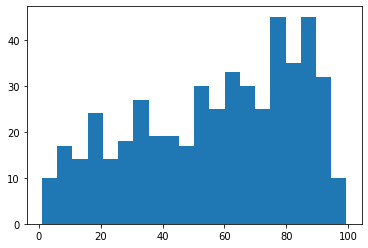

0.003301560255436246

In [24]:
gender_pairwise_ranking_test("Star Wars: Episode V - The Empire Strikes Back (1980)")